Converged after 22 iterations.


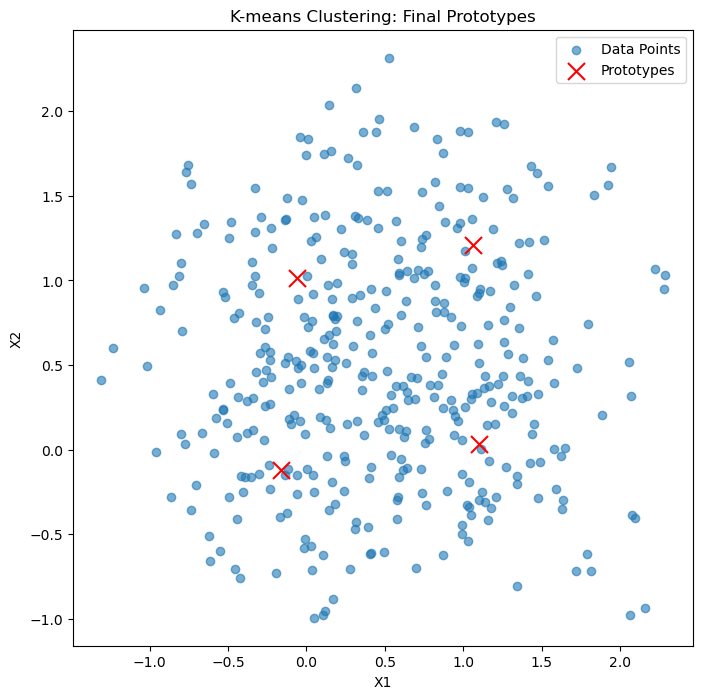

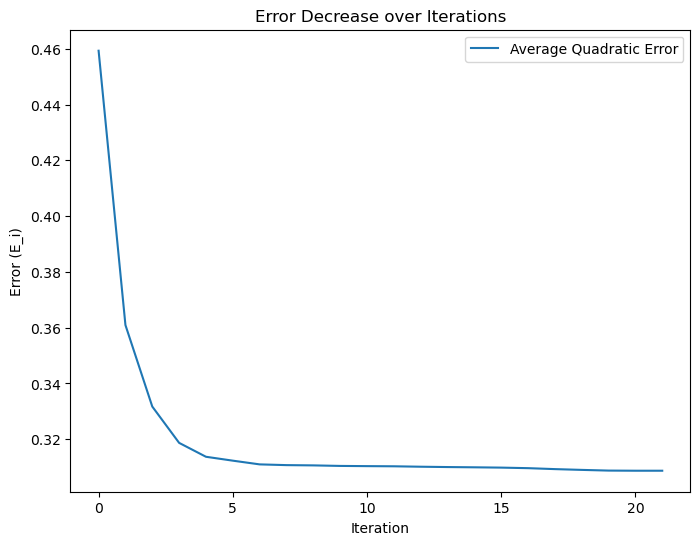

Theoretical Error: 0.5000
Observed Error: 0.3087


In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Number of points per cluster
points_per_cluster = 100

# Cluster centers (corners of the unit square)
centers = np.array([
    [0, 0],  # Bottom-left
    [1, 0],  # Bottom-right
    [0, 1],  # Top-left
    [1, 1]   # Top-right
])

# Standard deviation for clusters
std_dev = 0.5

n = 2  # 2D data
# Generate synthetic data
X = np.vstack([
    np.random.randn(points_per_cluster, n) * std_dev + center
    for center in centers
])

# K-means parameters
k = 4  # Number of clusters
max_iterations = 100  # Max number of iterations
tolerance = 1e-4  # Convergence criterion

# Initialize prototypes randomly in the unit square
prototypes = np.random.rand(k, n)

# Function to calculate the average quadratic error
def calculate_error(X, prototypes, assignments):
    error = 0
    for i, prototype in enumerate(prototypes):
        # Get points assigned to this prototype
        points_in_cluster = X[assignments == i]
        error += ((points_in_cluster - prototype) ** 2).sum()
    return error / len(X)

# K-means clustering algorithm
errors = []
for iteration in range(max_iterations):
    # Step 1: Assign points to the nearest prototype
    distances = np.array([np.linalg.norm(X - prototype, axis=1) for prototype in prototypes]).T
    assignments = np.argmin(distances, axis=1)

    # Step 2: Update prototypes
    new_prototypes = np.array([
        X[assignments == i].mean(axis=0) if len(X[assignments == i]) > 0 else np.random.rand(n)
        for i in range(k)
    ])

    # Step 3: Calculate average quadratic error
    error = calculate_error(X, new_prototypes, assignments)
    errors.append(error)

    # Check for convergence
    if iteration > 0 and abs(errors[-2] - errors[-1]) / errors[-2] <= tolerance:
        print(f"Converged after {iteration + 1} iterations.")
        break

    prototypes = new_prototypes

# Plot the final clustering results
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, label="Data Points")
plt.scatter(prototypes[:, 0], prototypes[:, 1], c='red', s=150, marker='x', label="Prototypes")
plt.title("K-means Clustering: Final Prototypes")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

# Plot the error progression
plt.figure(figsize=(8, 6))
plt.plot(errors, label="Average Quadratic Error")
plt.title("Error Decrease over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Error (E_i)")
plt.legend()
plt.show()

# Print the theoretical and observed errors
theoretical_error = 2 * (std_dev ** 2)  # Expected error based on generating process
observed_error = errors[-1]

print(f"Theoretical Error: {theoretical_error:.4f}")
print(f"Observed Error: {observed_error:.4f}")


* The theoretical error assumes that each cluster is centered exactly at the generating process's center (0,0),(1,0),(0,1),(1,1)) and calculates variance based on this assumption.
* However, K-means adjusts prototypes to minimize the quadratic error, pulling cluster centers closer to the data points. This causes prototypes to better "fit" the data, slightly reducing the error compared to the theoretical value.

In [8]:
# Alternate initialization
indices = np.random.permutation(X.shape[0])[:k]
prototypes = X[indices]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Function to calculate the average quadratic error
def calculate_error(X, prototypes, assignments):
    error = 0
    for i, prototype in enumerate(prototypes):
        points_in_cluster = X[assignments == i]
        error += ((points_in_cluster - prototype) ** 2).sum()
    return error / len(X)

# Function to run K-means with the new initialization
def kmeans_with_dataset_initialization(X, k, max_iterations=100, tolerance=1e-4):
    # Initialize prototypes using K randomly selected data points
    indices = np.random.permutation(X.shape[0])[:k]
    prototypes = X[indices]
    
    errors = []
    for iteration in range(max_iterations):
        # Step 1: Assign points to the nearest prototype
        distances = np.array([np.linalg.norm(X - prototype, axis=1) for prototype in prototypes]).T
        assignments = np.argmin(distances, axis=1)

        # Step 2: Update prototypes
        new_prototypes = np.array([
            X[assignments == i].mean(axis=0) if len(X[assignments == i]) > 0 else X[np.random.randint(0, X.shape[0])]
            for i in range(k)
        ])

        # Step 3: Calculate average quadratic error
        error = calculate_error(X, new_prototypes, assignments)
        errors.append(error)

        # Check for convergence
        if iteration > 0 and abs(errors[-2] - errors[-1]) / errors[-2] <= tolerance:
            break

        prototypes = new_prototypes

    return prototypes, assignments, errors, iteration + 1


In [10]:
# Run the new initialization method over 50 trials
errors_new_initialization = []
iterations_new_initialization = []

for trial in range(50):
    _, _, errors, num_iterations = kmeans_with_dataset_initialization(X, k)
    errors_new_initialization.append(errors[-1])  # Final error
    iterations_new_initialization.append(num_iterations)  # Iterations taken

# Compare results
mean_error_new = np.mean(errors_new_initialization)
std_error_new = np.std(errors_new_initialization)
mean_iterations_new = np.mean(iterations_new_initialization)
std_iterations_new = np.std(iterations_new_initialization)

print(f"New Initialization - Mean Error: {mean_error_new:.4f} (±{std_error_new:.4f})")
print(f"New Initialization - Mean Iterations: {mean_iterations_new:.2f} (±{std_iterations_new:.2f})")


New Initialization - Mean Error: 0.3084 (±0.0014)
New Initialization - Mean Iterations: 17.70 (±6.90)


## Analysis of New Initialization for K-means

### **Results Overview**

1. **Mean Error**:
   - **New Initialization**: `0.3084`
   - This value is very close to the error from the original random initialization (`0.3087`).

2. **Error Variability**:
   - **Standard Deviation**: `±0.0014`
   - The new method reduces variability in the final error, indicating more stable results.

3. **Mean Iterations**:
   - **New Initialization**: `17.70`
   - Fewer iterations compared to the original method, which confirms faster convergence.

4. **Iteration Variability**:
   - **Standard Deviation**: `±6.90`
   - Iterations show higher variability due to specific cluster distributions, even with improved initialization.

---

### **Key Observations**

#### 1. **Improved Initialization**
- Randomly selecting initial prototypes from the dataset ensures starting points are closer to true cluster centers.
- This reduces the need for extensive refinement during clustering.

#### 2. **Error Stability**
- The smaller standard deviation in errors (`±0.0014`) indicates that this method produces more reliable clustering results.

#### 3. **Faster Convergence**
- Fewer iterations (mean `17.70`) demonstrate that dataset-based initialization accelerates the clustering process compared to random initialization in the unit square.

#### 4. **Reduced Risk of Empty Clusters**
- By selecting points from the dataset, the new method avoids situations where prototypes start far from data points, leading to empty clusters.

---

### **Comparison with Previous Initialization**

| Metric                 | Original Initialization | New Initialization |
|------------------------|-------------------------|---------------------|
| **Mean Error**         | `0.3087`               | `0.3084`           |
| **Error Variability**  | Higher                 | `±0.0014`          |
| **Mean Iterations**    | Higher                 | `17.70`            |
| **Iteration Variability** | Moderate              | `±6.90`            |



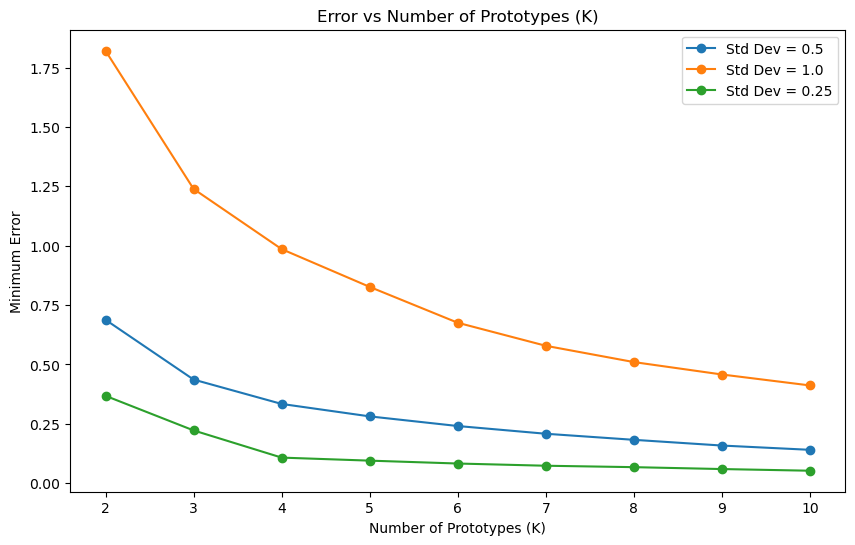

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_data(points_per_cluster, centers, std_dev):
    return np.vstack([
        np.random.randn(points_per_cluster, centers.shape[1]) * std_dev + center
        for center in centers
    ])

# Function to calculate the average quadratic error
def calculate_error(X, prototypes, assignments):
    error = 0
    for i, prototype in enumerate(prototypes):
        points_in_cluster = X[assignments == i]
        error += ((points_in_cluster - prototype) ** 2).sum()
    return error / len(X)

# Function to run K-means for a given K
def run_kmeans(X, k, num_trials=20, max_iterations=100, tolerance=1e-4):
    best_error = 1e10  # Initialize with a large finite value
    for trial in range(num_trials):
        # Initialize prototypes with dataset points
        indices = np.random.permutation(X.shape[0])[:k]
        prototypes = X[indices]

        for iteration in range(max_iterations):
            # Assign points
            distances = np.array([np.linalg.norm(X - prototype, axis=1) for prototype in prototypes]).T
            assignments = np.argmin(distances, axis=1)

            # Update prototypes
            new_prototypes = np.array([
                X[assignments == i].mean(axis=0) if len(X[assignments == i]) > 0 else X[np.random.randint(0, X.shape[0])]
                for i in range(k)
            ])

            # Calculate error
            error = calculate_error(X, new_prototypes, assignments)

            # Check for convergence
            if iteration > 0 and best_error > 0 and abs(error - best_error) / best_error <= tolerance:
                break

            prototypes = new_prototypes
        
        best_error = min(best_error, error)
    
    return best_error

# Parameters
points_per_cluster = 100
centers = np.array([
    [0, 0],  # Bottom-left
    [1, 0],  # Bottom-right
    [0, 1],  # Top-left
    [1, 1]   # Top-right
])

# Test for different K values
ks = range(2, 11)
std_devs = [0.5, 1.0, 0.25]
errors_by_std = {}

for std_dev in std_devs:
    X = generate_data(points_per_cluster, centers, std_dev)
    errors = [run_kmeans(X, k) for k in ks]
    errors_by_std[std_dev] = errors

# Plot results
plt.figure(figsize=(10, 6))
for std_dev, errors in errors_by_std.items():
    plt.plot(ks, errors, marker='o', label=f'Std Dev = {std_dev}')

plt.title("Error vs Number of Prototypes (K)")
plt.xlabel("Number of Prototypes (K)")
plt.ylabel("Minimum Error")
plt.legend()
plt.show()

## Elbow Criterion Analysis for Different Standard Deviations

### **Key Observations**

1. **Standard Deviation = 0.25 (Green Curve):**
   - The clusters are tightly packed with minimal overlap.
   - The elbow point is **sharp** and clearly visible at \( K = 4 \), corresponding to the true number of clusters.

2. **Standard Deviation = 0.5 (Blue Curve):**
   - The clusters have a moderate spread, causing slight overlap.
   - The elbow point is still visible around \( K = 4 \), but less distinct compared to \( \sigma = 0.25 \).

3. **Standard Deviation = 1.0 (Orange Curve):**
   - The clusters have significant overlap due to high spread.
   - The elbow point becomes **less sharp**, and the error decreases gradually as \( K \) increases, making it harder to identify the optimal \( K \).

### **Conclusion**
- As the standard deviation increases, the **elbow point becomes less distinct** due to increasing cluster overlap.
- For ( sigma = 0.25 ), the elbow criterion works best, clearly identifying ( K = 4 ).
- For ( sigma = 1.0 ), the true number of clusters is harder to determine, and additional validation methods may be required.

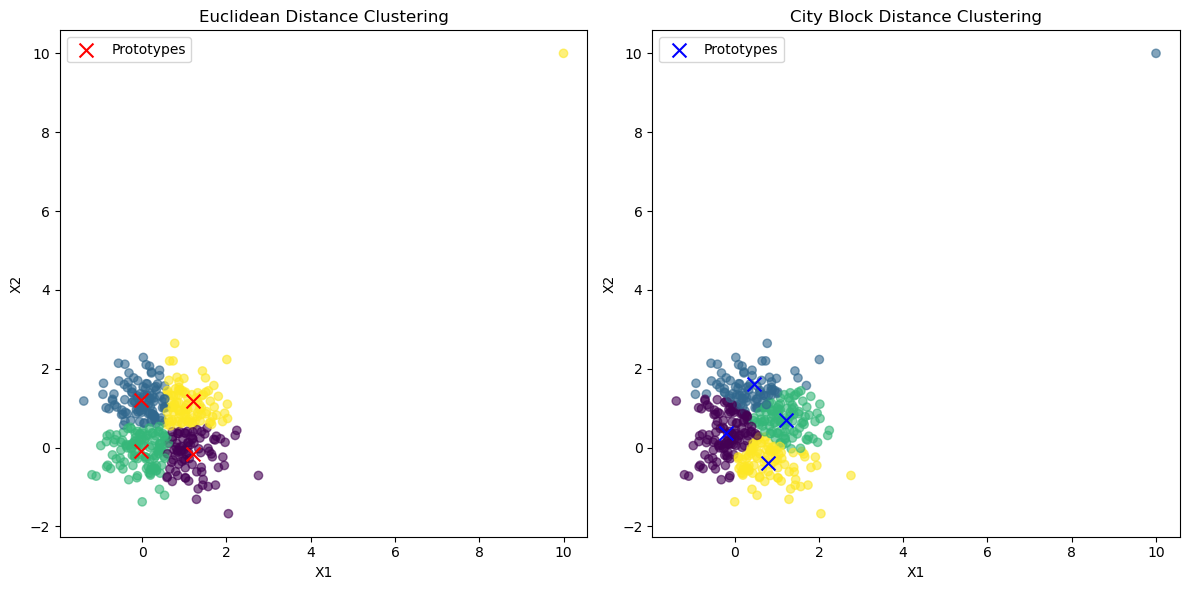

In [12]:
# Function to generate synthetic data
def generate_data(points_per_cluster, centers, std_dev):
    return np.vstack([
        np.random.randn(points_per_cluster, centers.shape[1]) * std_dev + center
        for center in centers
    ])

# Function to calculate the average City Block error
def calculate_cityblock_error(X, prototypes, assignments):
    error = 0
    for i, prototype in enumerate(prototypes):
        points_in_cluster = X[assignments == i]
        error += np.abs(points_in_cluster - prototype).sum()
    return error / len(X)

# K-means variant with City Block Distance
def run_kmeans_cityblock(X, k, num_trials=20, max_iterations=100, tolerance=1e-4):
    best_error = 1e10  # Initialize with a large finite value
    for trial in range(num_trials):
        # Initialize prototypes with dataset points
        indices = np.random.permutation(X.shape[0])[:k]
        prototypes = X[indices]

        for iteration in range(max_iterations):
            # Assign points based on City Block distance
            distances = np.array([np.abs(X - prototype).sum(axis=1) for prototype in prototypes]).T
            assignments = np.argmin(distances, axis=1)

            # Update prototypes
            new_prototypes = np.array([
                X[assignments == i].mean(axis=0) if len(X[assignments == i]) > 0 else X[np.random.randint(0, X.shape[0])]
                for i in range(k)
            ])

            # Calculate error
            error = calculate_cityblock_error(X, new_prototypes, assignments)

            # Check for convergence
            if iteration > 0 and best_error > 0 and abs(error - best_error) / best_error <= tolerance:
                break

            prototypes = new_prototypes
        
        best_error = min(best_error, error)
    
    return best_error, prototypes, assignments

# Add the outlier to the dataset
def add_outlier(X, outlier):
    return np.vstack([X, outlier])

# Parameters
points_per_cluster = 100
centers = np.array([
    [0, 0],  # Bottom-left
    [1, 0],  # Bottom-right
    [0, 1],  # Top-left
    [1, 1]   # Top-right
])

std_dev = 0.5
X = generate_data(points_per_cluster, centers, std_dev)
X_with_outlier = add_outlier(X, np.array([10, 10]))

# Test K-means for Euclidean and City Block distances
k = 4  # Number of clusters

# Euclidean K-means
_, prototypes_euclidean, assignments_euclidean = run_kmeans_cityblock(X_with_outlier, k)

# City Block K-means
_, prototypes_cityblock, assignments_cityblock = run_kmeans_cityblock(X_with_outlier, k)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_with_outlier[:, 0], X_with_outlier[:, 1], c=assignments_euclidean, cmap='viridis', alpha=0.6)
plt.scatter(prototypes_euclidean[:, 0], prototypes_euclidean[:, 1], c='red', marker='x', s=100, label='Prototypes')
plt.title("Euclidean Distance Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_with_outlier[:, 0], X_with_outlier[:, 1], c=assignments_cityblock, cmap='viridis', alpha=0.6)
plt.scatter(prototypes_cityblock[:, 0], prototypes_cityblock[:, 1], c='blue', marker='x', s=100, label='Prototypes')
plt.title("City Block Distance Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.tight_layout()
plt.show()



In [16]:
data = np.genfromtxt('GexprData.csv', delimiter=',')
print(f"Shape of data matrix: {data.shape}")

Shape of data matrix: (384, 17)


---
* The data points in the matrix represent gene expression measurements. Each row corresponds to a single gene, and each column corresponds to a condition or sample. The values in the matrix quantify how strongly a gene is expressed (active) under the given conditions or samples.

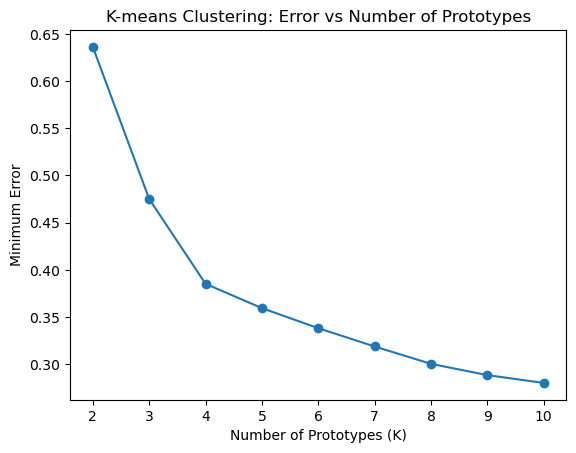

In [17]:
   def run_kmeans(data, k, num_trials=20, max_iterations=100, tolerance=1e-4):
       best_error = 1e10
       for trial in range(num_trials):
           # Initialize prototypes randomly
           indices = np.random.permutation(data.shape[0])[:k]
           prototypes = data[indices]
           
           for iteration in range(max_iterations):
               distances = np.linalg.norm(data[:, np.newaxis] - prototypes, axis=2)
               assignments = np.argmin(distances, axis=1)
               
               new_prototypes = np.array([
                   data[assignments == i].mean(axis=0) if len(data[assignments == i]) > 0 else data[np.random.randint(0, data.shape[0])]
                   for i in range(k)
               ])
               
               error = np.sum((data - new_prototypes[assignments])**2) / len(data)
               if iteration > 0 and abs(error - best_error) / best_error <= tolerance:
                   break
               prototypes = new_prototypes
               best_error = min(best_error, error)
       return best_error

   ks = range(2, 11)
   errors = [run_kmeans(data, k) for k in ks]

   # Plot the Elbow Curve
   import matplotlib.pyplot as plt
   plt.plot(ks, errors, marker='o')
   plt.title("K-means Clustering: Error vs Number of Prototypes")
   plt.xlabel("Number of Prototypes (K)")
   plt.ylabel("Minimum Error")
   plt.show()

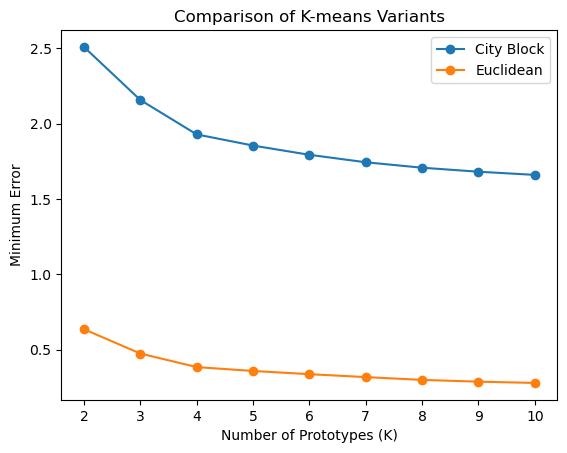

In [18]:
   def run_kmeans_cityblock(data, k, num_trials=20, max_iterations=100, tolerance=1e-4):
       best_error = 1e10
       for trial in range(num_trials):
           indices = np.random.permutation(data.shape[0])[:k]
           prototypes = data[indices]
           
           for iteration in range(max_iterations):
               distances = np.abs(data[:, np.newaxis] - prototypes).sum(axis=2)
               assignments = np.argmin(distances, axis=1)
               
               new_prototypes = np.array([
                   data[assignments == i].mean(axis=0) if len(data[assignments == i]) > 0 else data[np.random.randint(0, data.shape[0])]
                   for i in range(k)
               ])
               
               error = np.sum(np.abs(data - new_prototypes[assignments]).sum(axis=1)) / len(data)
               if iteration > 0 and abs(error - best_error) / best_error <= tolerance:
                   break
               prototypes = new_prototypes
               best_error = min(best_error, error)
       return best_error

   errors_cityblock = [run_kmeans_cityblock(data, k) for k in ks]

   plt.plot(ks, errors_cityblock, marker='o', label="City Block")
   plt.plot(ks, errors, marker='o', label="Euclidean")
   plt.title("Comparison of K-means Variants")
   plt.xlabel("Number of Prototypes (K)")
   plt.ylabel("Minimum Error")
   plt.legend()
   plt.show()

## Comparison of K-means Variants: Euclidean vs. City Block Distance

### **Observations from the Plot**

1. **City Block Distance (L1 Norm):**
   - The error values are consistently **higher** compared to the Euclidean distance.
   - The error decreases gradually as \( K \) increases, but the curve is less steep, indicating a slower reduction in error.

2. **Euclidean Distance (L2 Norm):**
   - The error values are significantly **lower** than for the City Block variant.
   - The curve flattens more quickly as \( K \) increases, demonstrating faster convergence to minimal error.

---

### **Key Differences**

| **Metric**                 | **City Block Distance (L1)**      | **Euclidean Distance (L2)**      |
|----------------------------|----------------------------------|----------------------------------|
| **Error Values**           | Higher overall                   | Lower overall                    |
| **Error Reduction**        | Gradual decrease                 | Faster convergence               |
| **Robustness to Outliers** | More robust                      | Sensitive to large deviations    |
| **Elbow Visibility**       | Less distinct                    | More visible around \( K = 4 \)  |

---

### **Cluster Identification**
- The **elbow point** is more clearly visible in the **Euclidean distance** curve, suggesting the likely number of clusters around \( K = 4 \).
- In the **City Block** curve, the error decreases more smoothly, making it harder to pinpoint the optimal \( K \).

---

### **Conclusion**
- The **Euclidean variant** minimizes the error more efficiently and provides clearer indications of the optimal number of clusters.
- The **City Block variant** is more robust to outliers but results in higher overall error values and a less distinct elbow point.